# Problem

An advertising company has developed a new ad to have users engage with their questionnaire. The company has shown the new ad to some users and a dummy ad to others and wants their data analyst team to interpret the results. Does the new ad generate more responses to their questionnaire? Is it statistically significant? Is the company justified in using the new ad?

Dataset is found on kaggle from an advertising company. https://www.kaggle.com/osuolaleemmanuel/ad-ab-testing


# Data preprocessing

**Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Read the dataset

In [2]:
df=pd.read_csv('AB_test_AD.csv')

# Explore the data

In [3]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [5]:
df.describe(include='all')

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
count,8077,8077,8077,8077.000000,8077,8077.000000,8077,8077.000000,8077.000000
unique,8077,2,8,NaN,269,NaN,15,NaN,NaN
top,0008ef63-77a7-448b-bd1e-075f42c55e39,control,2020-07-03,NaN,Generic Smartphone,NaN,Chrome Mobile,NaN,NaN
freq,1,4071,2015,NaN,4743,NaN,4554,NaN,NaN
mean,NaN,NaN,NaN,11.615080,NaN,5.947134,NaN,0.070818,0.083075
std,NaN,NaN,NaN,5.734879,NaN,0.224333,NaN,0.256537,0.276013
min,NaN,NaN,NaN,0.000000,NaN,5.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,7.000000,NaN,6.000000,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,13.000000,NaN,6.000000,NaN,0.000000,0.000000
75%,NaN,NaN,NaN,15.000000,NaN,6.000000,NaN,0.000000,0.000000


# Data Cleaning

**missing values**
<br>Handle missing values with either dropping the rows with missing values or fill in the missing values with appropriate values.

In [6]:
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

**duplicates**

In [7]:
df.duplicated().any().sum()

0

**Drop unnecessary columns**

In [8]:
df.drop(columns='auction_id',inplace=True)

In [9]:
df.columns

Index(['experiment', 'date', 'hour', 'device_make', 'platform_os', 'browser',
       'yes', 'no'],
      dtype='object')

**Choose an appropriate index if necessary**

In [10]:
df.set_index('date',drop=True,inplace=True)

In [11]:
df.head()

,experiment,hour,device_make,platform_os,browser,yes,no
date,,,,,,,
2020-07-10,exposed,8,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-07,exposed,10,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-05,exposed,2,E5823,6,Chrome Mobile WebView,0,1
2020-07-03,control,15,Samsung SM-A705FN,6,Facebook,0,0
2020-07-03,control,15,Generic Smartphone,6,Chrome Mobile,0,0


# A/B test modeling
<br>Steps for analyzing A/B test results:

    * Choosing an appropriate statistical test
    * Calculating the test statistics (T)
    * Calculating the p-value of the test statistics
    * Reject or fail to reject the statistical hypothesis (statistical significance)
    * Calculate the margin of error (external validity of the experiment)
    * Calculate confidence interval (external validity and practical significance of the experiment)

In [12]:
df['response'] = np.where((df['yes']==1)| (df['no']==1), 1, 0)

In [13]:
df.head()

,experiment,hour,device_make,platform_os,browser,yes,no,response
date,,,,,,,,
2020-07-10,exposed,8,Generic Smartphone,6,Chrome Mobile,0,0,0
2020-07-07,exposed,10,Generic Smartphone,6,Chrome Mobile,0,0,0
2020-07-05,exposed,2,E5823,6,Chrome Mobile WebView,0,1,1
2020-07-03,control,15,Samsung SM-A705FN,6,Facebook,0,0,0
2020-07-03,control,15,Generic Smartphone,6,Chrome Mobile,0,0,0


**Check the number of samples in control and treatment group**

In [14]:
df['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

  **Create contingency table** 

In [15]:
# Contingency Table
d = pd.pivot_table(columns ='experiment',  values = ['yes', 'no'], aggfunc=np.sum, data=df)

In [16]:
d

experiment,control,exposed
no,322,349
yes,264,308


**Formulating a hypothesis**

Given we don’t know if the new design for the BIO questionnaire will perform better or worse (or the same?) as our current design, we’ll choose a two-tailed test:
Null Hypothesis⟹Ho: Conversion rate of control group (CG)=Conversion rate of treatment or exposed group (EG)

Alternative Hypothesis⟹H1: Conversion rate of control group (CG)≠Conversion rate of treatment or exposed group (EG)

We’ll also set a confidence level of 95%:

α = 0.05

The α value is a threshold we set, by which we say “if the probability of observing a result as extreme or more (p-value) is lower than α, then we reject the Null hypothesis”. Since our α=0.05 (indicating 5% probability), our confidence (1 — α) is 95%.

Whatever conversion rate we observe for our new design in our test, we want to be 95% confident it is statistically different from the conversion rate of our old design, before we decide to reject the Null hypothesis Hₒ.

In [17]:
# Null hypothesis -> Ho : CR_CG = CR_EG
# Alternative hypothesis -> H1 : CR_CG ≠ CR_EG

After formulating the hypothesis and performing the experiment we collected the following data in the contingency table. **Calculate the conversion rate of control group and exposed group**

In [18]:
# # The conversion rate of CG and EG
# CG=264/(264+322)
# EG=308/(308+349)
# print(CG,EG)
# EG-CG

# proportion difference

In [19]:
X_con = 264 #no of responses in control group 
N_con = 322 + 264 #no of total observations in control group
X_exp = 308 #no of responses in treatment group 
N_exp = 349 + 308 #no of total observations in treatment group

# ratio of responses in control group
p_con = X_con / N_con

# ratio of responses in treatment group
p_exp = X_exp / N_exp

In [20]:
# proportion difference
proportion_difference = abs(p_con - p_exp)
proportion_difference = round(proportion_difference, 3)
proportion_difference

0.018

The conversion rate of the treatment group's value is higher than the control group. Is this difference statistically significant?

# 95% Confidence interval

proportion_difference ± 2 × SE(proportion_difference)

In [21]:
p_pooled = (X_con + X_exp)/(N_con + N_exp)
pooled_variance = p_pooled*(1-p_pooled) * (1/N_con + 1/N_exp)

# Standard Error
SE = np.sqrt(pooled_variance)

print(f'Standard error = {SE: .4f}')

Standard error =  0.0283


In [22]:
# Significance Level
alpha = 0.05

# critical value usig the standard normal distribution
# takes a percentage and returns a standard deviation multiplier for what value that percentage occurs at.
Z_crit = norm.ppf(1-alpha/2)

# Confidence Interval
CI = [(p_con-p_exp) - SE * Z_crit, (p_con-p_exp) + SE * Z_crit]

print(np.round(CI,4))

[-0.0738  0.0372]


Confidence interval contains 0 which means there is a good chance that there is no difference between proportions.

**Testing the hypothesis**

Using statistical significance tests we can measure if the collected data shows a result more extreme than the chance might produce. If the result is beyond the chance variation, then it is statistically significant. In this example, we have categorical variables in the contingency data format, which follow a Bernoulli distribution. Bernoulli Distribution has a probability of being 1 and a probability of being 0. In our example, it is conversion=1 and no conversion=0. Considering we are using the conversions as the metric, which is a categorical variable following Bernoulli distribution, we will be using the Chi-Squared test to interpret the results.

The Chi-Squared test assumes observed frequencies for a categorical variable match with the expected frequencies. It calculates a test statistic (Chi) that has a chi-squared distribution and is interpreted to reject or fail to reject the null hypothesis if the expected and observed frequencies are the same. In this article, we will be using scipy.stats package for the statistical functions.
The probability density function of Chi-Squared distribution varies with the degrees of freedom (df) which depends on the size of the contingency table, and calculated as df=(#rows-1)*(#columns-1) In this example df=1.

Key terms we need to know to interpret the test result using Python are p-value and alpha. P-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct. P-value is is one of the outcomes of the test. Alpha also known as the level of statistical significance is the probability of making type I error (rejecting the null hypothesis when it is actually true). The probability of making a type II error (failing to reject the null hypothesis when it is actually false) is called beta, but it is out of scope for this article. In general, alpha is taken as 0.05 indicating 5% risk of concluding a difference exists between the groups when there is no actual difference.

In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:

If p-value <= alpha: significant result, reject null hypothesis
If p-value > alpha: not significant result, do not reject null hypothesis
We can also interpret the test result by using the test statistic and the critical value:

If test statistic >= critical value: significant result, reject null hypothesis
If test statistic < critical value: not significant result, do not to reject null hypothesis

# Two sample Z test of proportions (for n>30)

In [23]:
# test statsitics
Test_stat = (p_con - p_exp)/SE


# two sided test 
p_value = norm.sf(-abs(Test_stat))*2


if np.abs(Test_stat) >= Z_crit:
    print("reject the null")
    print(round(p_value,4))
else:
  print('failed to reject null hypothesis')    

print(f""" Test Statistics stat = {Test_stat: .3f},
Z-critical = {Z_crit: .3f},
P_value = {p_value: .3f},
Confidence Interval of 2 sample Z-test for proportions = {np.round(CI,4)}""")

failed to reject null hypothesis
 Test Statistics stat = -0.646,
Z-critical =  1.960,
P_value =  1.482,
Confidence Interval of 2 sample Z-test for proportions = [-0.0738  0.0372]


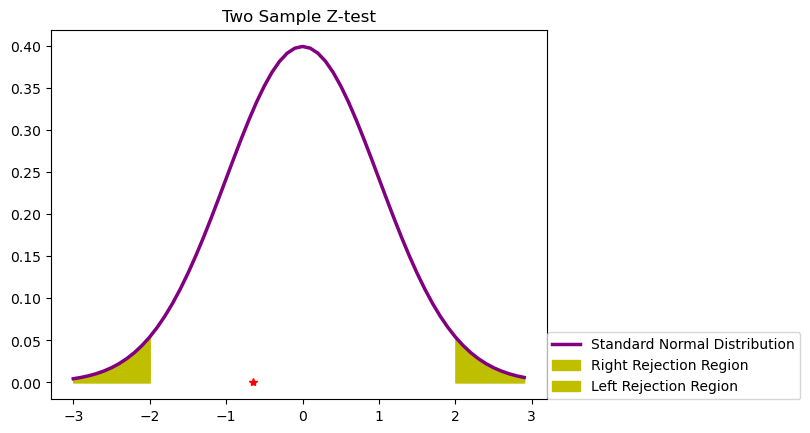

In [24]:
import matplotlib.pyplot as plt
z = np.arange(-3,3,  0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'purple',linewidth = 2.5)
plt.plot(Test_stat, 0, '*',color = 'red',linewidth = 2.5)
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label = 'Right Rejection Region',color ='y' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label = 'Left Rejection Region',color ='y' )
plt.title("Two Sample Z-test")
plt.legend(loc=(1,0))
plt.show()

# Chi Square Test

In [25]:
from scipy.stats import chi2_contingency

# Create the contingency table as a 2D numpy array
data = [[264, 308], [322, 349]]


X2, pval, dof, expected_freq = chi2_contingency(data)


if pval < 0.05:
    print("reject the null")
    print(round(p_value,4))
else:
  print('failed to reject null hypothesis')


print(f'test statistic = {round(X2,3)}')

failed to reject null hypothesis
test statistic = 0.347


# Fisher test

In [26]:
df[df['response']==1].groupby('experiment')['yes'].value_counts()

experiment  yes
control     0      322
            1      264
exposed     0      349
            1      308
Name: yes, dtype: int64

In [27]:
from scipy.stats import fisher_exact
  
odd_ratio, pval = fisher_exact(data,)

if pval < 0.05:
    print("reject the null")
    print(round(p_value,4))
else:
  print('failed to reject null hypothesis')
  print(f'p-value = {round(p_value,4)}')

failed to reject null hypothesis
p-value = 1.4815


Therefore, we conclude that there is not enough evidence to suggest that there is a significant association between proportion differences in control and exposed group.